In [7]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the Iris dataset
irisData = load_iris()
iris_df = pd.DataFrame(irisData.data, columns=irisData.feature_names)
iris_df['species'] = irisData.target

In [11]:
# 1. Simple Random Sampling (20% sample of the dataset)
simple_random_sample = iris_df.sample(frac=0.2, random_state=1)

In [13]:
# 2. Stratified Sampling (20% sample from each species)
stratified_sample = iris_df.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))

C:\Users\marmi\AppData\Local\Temp\ipykernel_4644\26481014.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = iris_df.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))


In [15]:
# 3. Cluster Sampling (Dividing into 3 clusters based on species and sampling from one cluster)
cluster_sample = iris_df[iris_df['species'] == 1]  # Selecting one cluster (species = 1)

In [17]:
# 4. Systematic Sampling (Selecting every 5th sample in the dataset)
systematic_sample = iris_df.iloc[::5]

In [19]:
# Set the figure size
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

<Figure size 1600x1200 with 0 Axes>

In [21]:
# Visualize sepal length distribution for each sampling technique
sampling_methods = {
    "Simple Random Sample": simple_random_sample,
    "Stratified Sample": stratified_sample,
    "Cluster Sample": cluster_sample,
    "Systematic Sample": systematic_sample,

}

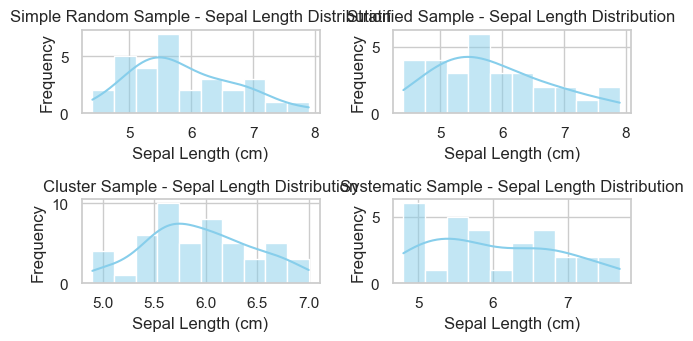

In [23]:
# Loop through each sampling technique and plot
for i, (method, sample_data) in enumerate(sampling_methods.items(), 1):
    plt.subplot(3, 2, i)
    sns.histplot(sample_data['sepal length (cm)'], kde=True, bins=10, color='skyblue')
    plt.title(f"{method} - Sepal Length Distribution")
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
